In [2]:
from particle import Particle
from structure import Layer,Aluminum,Lead,Scintillator, Structure
import numpy as np

In [3]:
# Creation of the detector
Al = Aluminum(1)
Pb = Lead(4)
Si = Scintillator(4)
detec_unit = Structure([Al,Pb,Al,Si])
detec = detec_unit.mult(16)
print(detec.top())


160


In [4]:
# Creation of the particle
import matplotlib.pyplot as plt

pos_init = np.array([0.,0.])
mass = 105.7*10**6
energy = 2*10**8
charge = -1
angle = np.pi/2
muon = Particle(charge,mass,energy,np.copy(pos_init),np.pi/2)
print(muon.beta())




0.8489333012669488


In [5]:
#function running the simulation
import copy
def propagation(part_model,detec,dx = 0.001,freq = 1):
    part = copy.deepcopy(part_model)
    energies = [part.energy]
    x = np.copy(part.pos)
    counter = 1
    while part.energy > part.mass and part.pos[1] + dx*np.sin(part.theta) <= detec.top():
        part.pos += dx*np.array([np.cos(part.theta),np.sin(part.theta)]) 
        part.energy -= dx*0.001*detec.material(part.pos[1]-dx/2*np.sin(part.theta)).bethe_bloch(part.beta(),part.charge)
        if counter % freq == 0:
            counter = 0
            energies.append(part.energy)
            x = np.vstack((x,part.pos))

    if part.energy > part.mass:
        print("The particule exited the detector with a remaining Kinetic energy of : ", part.energy - part.mass)
    else:
        print("The particule stopped at (x,z) = (", part.pos[0], ",", part.pos[1], ")\n \u0394r = ", np.linalg.norm(x[0]-part.pos), "mm")

    return energies,x

The particule stopped at (x,z) = ( 5.361136292622474e-15 , 87.554000000054 )
 Δr =  87.554000000054 mm


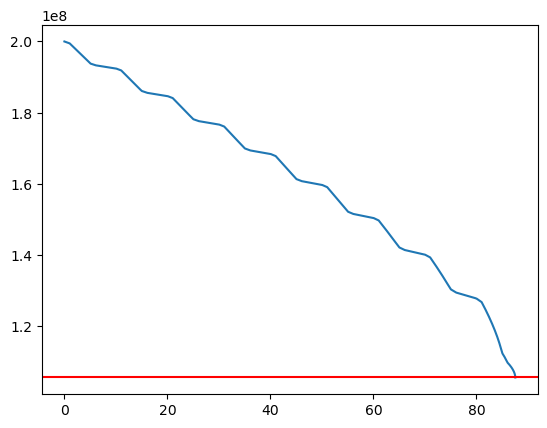

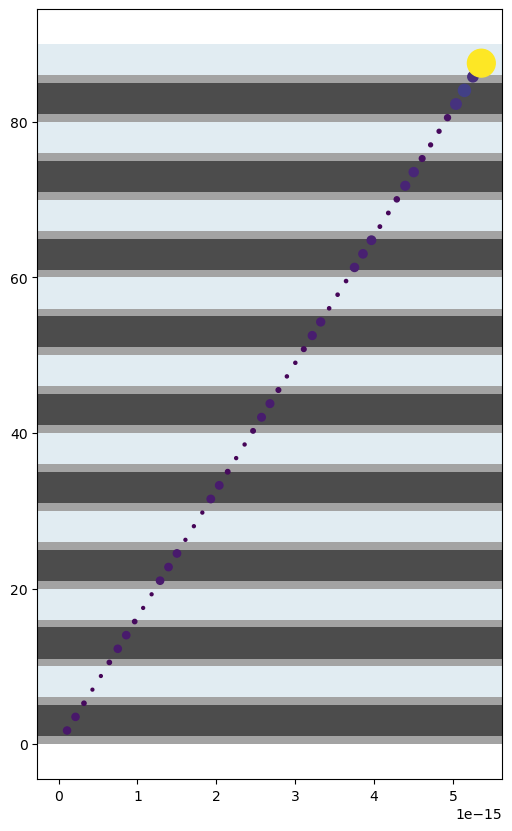

In [6]:
# Run
energies,x = propagation(muon,detec)


plt.plot(x[:,1],energies)
plt.axhline(muon.mass,color='r')
plt.show()

sampling = round(len(energies)/50)
energy_loss = [0]
energy_loss.extend([energies[i]-energies[i+1] for i in range(len(energies)-1)])
energy_loss = energy_loss[0::sampling]
traj_x = np.copy(x[0::sampling,0])
traj_z = np.copy(x[0::sampling,1])
np_energy_loss = np.array(energy_loss)


fig,ax = plt.subplots(figsize = (6,10))
for i in range(len(detec.layers)):
    plt.axhspan(detec.bound[i,0], detec.bound[i,1], facecolor=detec.layers[i].color, alpha=1)
    if detec.bound[i,1]>traj_z[-1]:
        break
ax.scatter(traj_x, traj_z, s=400*np_energy_loss/(max(np_energy_loss)), c=energy_loss)
plt.show()
